In [2]:
import pandas as pd
import matplotlib.pyplot as plt

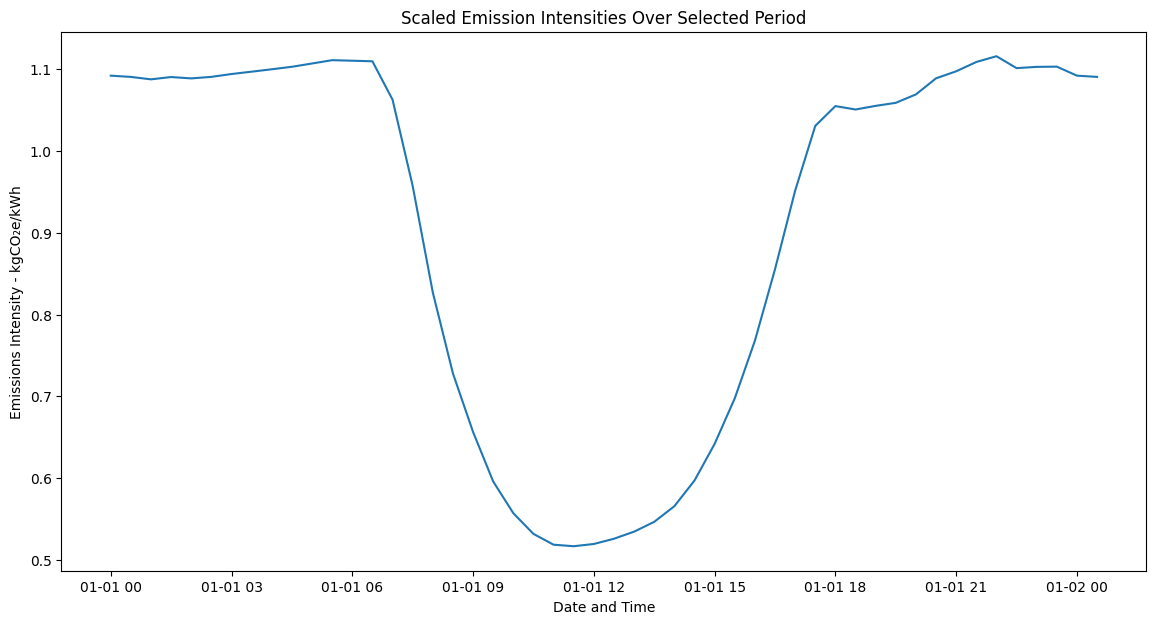

In [3]:
# 1. Load and prepare the yearly data
yearly_data = pd.read_csv('../../0raw_data/19981201_New_South_Wales_yearly.csv', parse_dates=['date'])
yearly_data['date'] = pd.to_datetime(yearly_data['date'])
yearly_data_filtered = yearly_data[(yearly_data['date'] >= '2010-07-01') & (yearly_data['date'] <= '2013-06-30')]
monthly_averages = yearly_data_filtered.groupby(yearly_data_filtered['date'].dt.to_period('M'))['Emissions Intensity - kgCO₂e/MWh'].mean()

# 2. Load and prepare the weekly data
weekly_data = pd.read_csv('../../0raw_data/20240405_New_South_Wales_weekly.csv', parse_dates=['date'])
weekly_data['time'] = weekly_data['date'].dt.time
daily_profile_average = weekly_data.groupby('time')['Emissions Intensity - kgCO₂e/MWh'].mean()

# 3. Normalize the daily profile by setting its average to 1
normalized_daily_profile = daily_profile_average / daily_profile_average.mean()

# 4. Creating a template DataFrame with all half-hour slots for every day in the range
date_range = pd.date_range('2010-07-01 00:00:00', '2013-06-30 23:30:00', freq='30T')
scaled_emissions = pd.DataFrame(index=date_range, columns=['emissions'])

# 5. Scale the normalized profile by the monthly average for each corresponding month
for single_date in scaled_emissions.index:
    month_period = single_date.to_period('M')
    if month_period in monthly_averages.index:
        month_intensity = monthly_averages[month_period]
        scaled_emissions.at[single_date, 'emissions'] = normalized_daily_profile[single_date.time()] * month_intensity

scaled_emissions['emissions'] /= 1000 # MWh to kWh

# 6. Plotting
start_date = pd.Timestamp('2011-01-01')
end_date = pd.Timestamp('2011-02-10')

# Filter the scaled emissions DataFrame to the specified date range
filtered_emissions = scaled_emissions[(scaled_emissions.index >= start_date) & (scaled_emissions.index <= end_date)]

# Plot the filtered result
plt.figure(figsize=(14, 7))
plt.plot(filtered_emissions.index[:50], filtered_emissions['emissions'][:50])
plt.title('Scaled Emission Intensities Over Selected Period')
plt.xlabel('Date and Time')
plt.ylabel('Emissions Intensity - kgCO₂e/kWh')
plt.show()

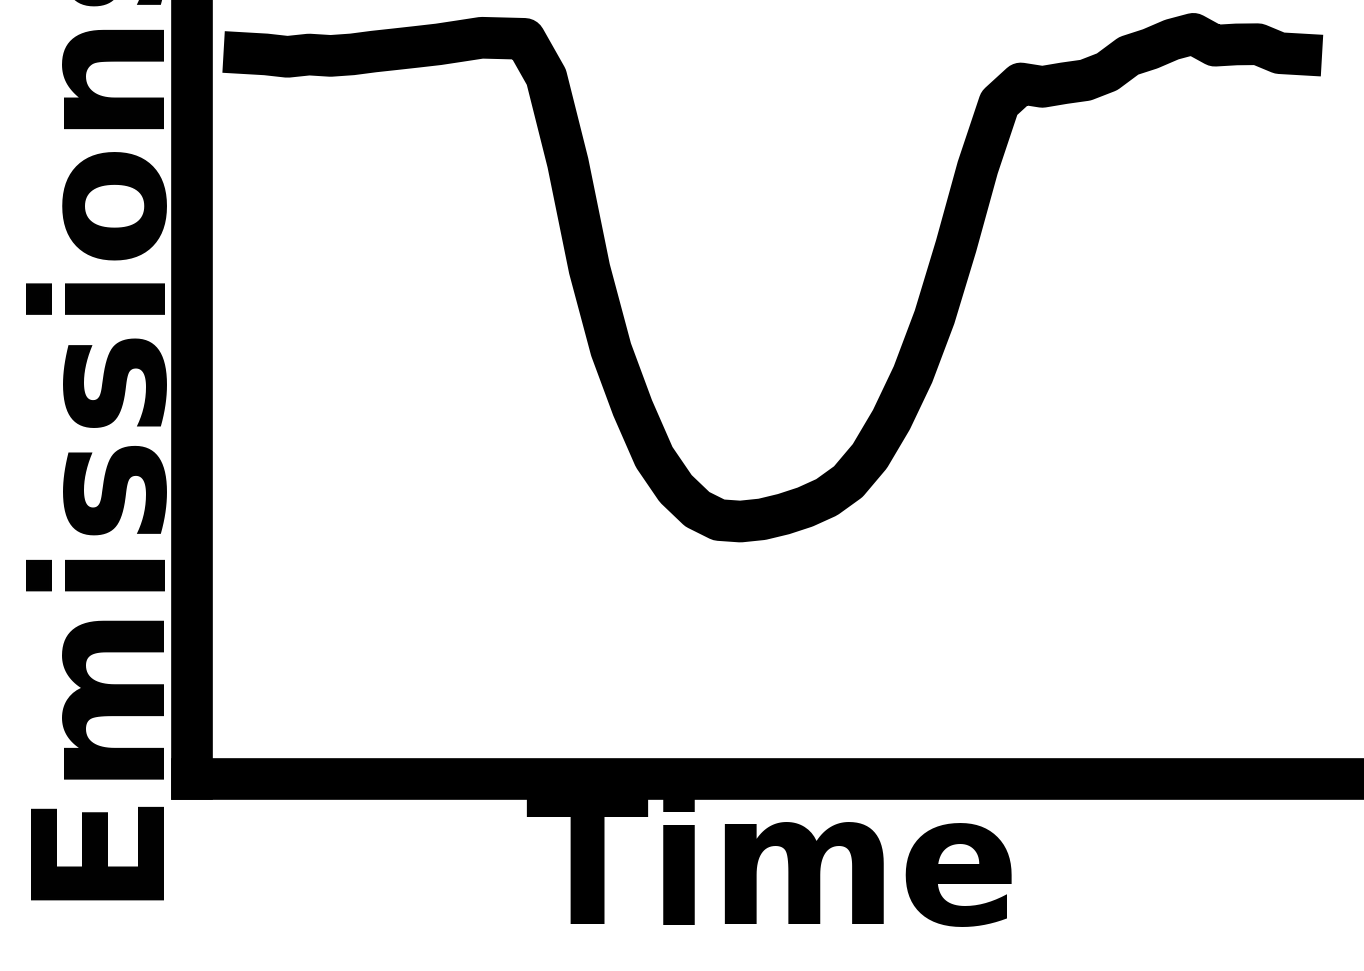

In [7]:
# Plot the filtered result #1EA391
plt.figure(figsize=(15, 10))
plt.plot(filtered_emissions.index[:50], filtered_emissions['emissions'][:50], color='black', linewidth=30)  # Set line color to black and double the thickness
plt.ylim(bottom=0.2)
# Set colors for axes, labels, and title
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['bottom'].set_color('black')  # Color the bottom spine
ax.spines['left'].set_color('black')  # Color the left spine

ax.spines['bottom'].set_linewidth(30)  # Make the x-axis line thicker
ax.spines['left'].set_linewidth(30)    # Make the y-axis line thicker

# Remove tick marks and labels
ax.set_xticks([])  # Remove x-axis tick marks
ax.set_yticks([])  # Remove y-axis tick marks

plt.xlabel('Time', color='black', fontweight='bold', fontsize=130)
plt.ylabel('Emissions', color='black', fontweight='bold', fontsize=130)
plt.savefig('filtered_emissions_plot.pdf', format='pdf',  dpi=300)
plt.show()

In [5]:
#scaled_emissions.to_csv('../../3final_data/Emission_Intensity_dataset.csv', index=True)